## 🛠️ Problema

El problema a resolver consiste en encontrar la máxima cantidad de rectángulos de dimensiones “a” y “b” (paneles solares) que caben dentro de un rectángulo de dimensiones “x” e “y” (techo), según se muestra en la siguiente figura:

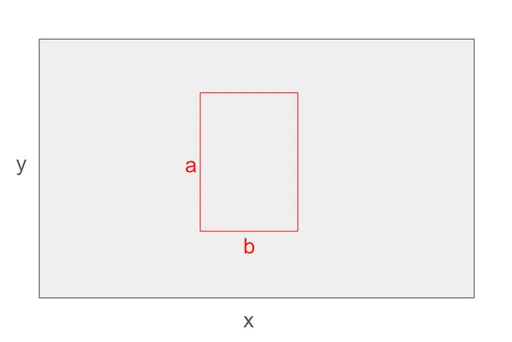

Por ejemplo, podríamos decir que en el siguiente ejemplo caben 5 rectángulos de dimensiones 1 y 2, en un rectángulo de dimensiones 3 y 5.

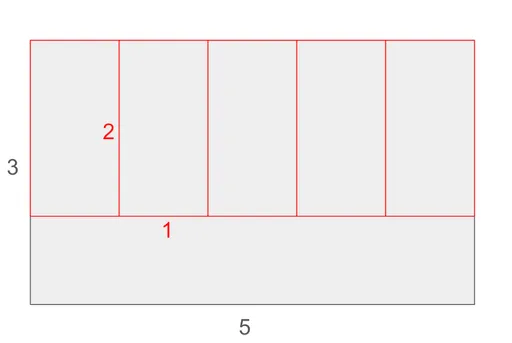

¿O caben más? 👀

## 💰 Bonus Opcional

¿Te pareció demasiado fácil? ¿Te entretuviste y quieres resolver algo un poco más complejo?

Te dejamos dos alternativas que puedes intentar resolver también. Pero ojo que con resolver el problema base bien ya es suficiente para entrar al proceso 🙂 Si haces el bonus, puedes explicarlo o no en el video. Solo recuerda que no debes pasarte de los 3 minutos de duración.

**Opción 1**

Repetir el ejercicio base, considerando un techo triangular, isóceles.

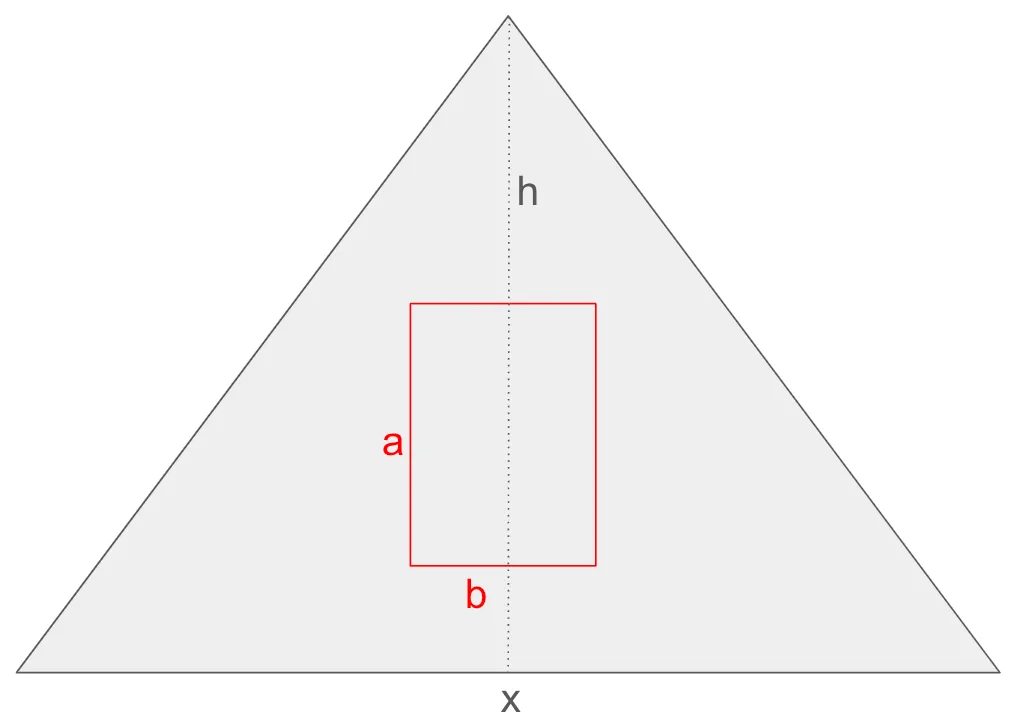


**Opción 2**

Repetir el ejercicio base considerando dos rectángulos iguales superpuestos. Puedes parametrizar la superposición entre ambos rectángulos.

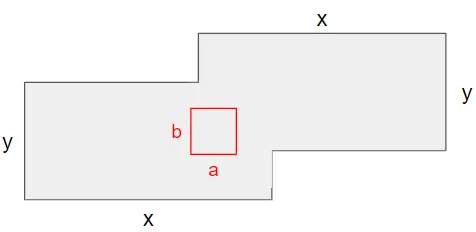

## 📖 Paper

[Bin Packing Optimization via Deep Reinforcement Learning](https://arxiv.org/pdf/2403.12420)



### Pensamiento: Distribución de Paneles en un Techo Rectangular

Supongamos que tenemos un techo de dimensiones `L` (largo) y `W` (ancho), y necesitamos colocar paneles rectangulares de dimensiones `l` (largo) y `w` (ancho). En principio, la distribución de los paneles podría hacerse de la siguiente manera:

#### **Distribución inicial sin rotación:**
Si colocamos los paneles sin rotarlos, la cantidad máxima de paneles que caben en el techo sería:

\[
\text{Número de paneles} = \left\lfloor \frac{L}{a} \right\rfloor \times \left\lfloor \frac{W}{b} \right\rfloor
\]

Esto es, el número de paneles en el largo del techo es \( \left\lfloor \frac{L}{a} \right\rfloor \), donde el símbolo \( \left\lfloor x \right\rfloor \) indica que estamos redondeando hacia abajo (es decir, tomando la parte entera). De manera similar, el número de paneles en el ancho es \( \left\lfloor \frac{W}{b} \right\rfloor \).

#### **Distribución con rotación:**
Si permitimos que los paneles se roten, es decir, colocamos los paneles de tal manera que sus lados `l` y `w` se intercambian, entonces la cantidad de paneles que caben en el techo sería:

\[
\text{Número de paneles (con rotación)} = \left\lfloor \frac{L}{w} \right\rfloor \times \left\lfloor \frac{W}{l} \right\rfloor
\]

#### **La orientación de los paneles:**
Es importante tener en cuenta que estas opciones de distribución (sin rotación y con rotación) siguen un **sentido fijo** en cada caso. En el caso sin rotación, los paneles se colocan alineados con el largo y el ancho del techo tal cual están. En el caso con rotación, los paneles se colocan rotados 90 grados, cambiando la alineación.

#### **El problema de espacio sobrante:**
Sin embargo, estas soluciones iniciales no son perfectas, ya que pueden dejar algo de espacio libre, tanto en el largo como en el ancho del techo. Este espacio sobrante podría aprovecharse de manera "inteligente" para colocar más paneles, pero no siempre será posible, dependiendo de las dimensiones del techo y los paneles.

Por ejemplo, aunque el número de paneles calculado sea óptimo según las fórmulas anteriores, siempre es recomendable considerar la posibilidad de ajustar la disposición para maximizar el uso del espacio sobrante. Dependiendo de la forma y el tamaño de los paneles, puede ser que los paneles adicionales encajen de manera eficiente en los espacios libres.

#### **Casos óptimos de combinación:**
En algunos casos, puede ser óptimo combinar ambas opciones de distribución (sin rotación y con rotación). Es decir, al colocar algunos paneles sin rotar y otros rotados, podemos aprovechar mejor el espacio disponible en el techo, especialmente cuando se tienen residuos de diferentes tamaños a lo largo de los bordes. Esta combinación permite un uso más eficiente del área, ya que podemos ajustar la disposición para que los paneles encajen mejor en los espacios sobrantes.


In [1]:
def number_of_panels(L, W, a, b):
    """Calcula el número de paneles que caben en un área de dimensiones L x W con paneles de dimensiones a x b"""
    return (L // a) * (W // b)

def max_panels(L, W, a, b):
    """Calcula el número máximo de paneles que caben en un techo de dimensiones L x W,
    considerando la posibilidad de rotar los paneles y aprovechar el espacio sobrante."""

    # Opción 1: Sin rotación: calcular la cantidad de paneles en orientación (a, b)
    op1 = number_of_panels(L, W, a, b)

    # Opción 2: Con rotación: calcular la cantidad de paneles en orientación (b, a)
    op2 = number_of_panels(L, W, b, a)

    # Retornar el máximo entre las opciones, considerando los restos
    return max(op1, op2)

# Definir dimensiones del techo y de los paneles
L = 12  # Largo del techo
W = 8   # Ancho del techo

# Paneles de 4x2 y 2x2
l1, w1 = 4, 2
l2, w2 = 2, 2

# Calcular el número máximo de paneles
max_panels_fit = max_panels(L, W, l1, w1)
max_panels_fit_2 = max_panels(L, W, l2, w2)

print(f"El número máximo de paneles 4x2 que caben en el techo es: {max_panels_fit}")
print(f"El número máximo de paneles 2x2 que caben en el techo es: {max_panels_fit_2}")


El número máximo de paneles 4x2 que caben en el techo es: 12
El número máximo de paneles 2x2 que caben en el techo es: 24


Hay un problema... no consideramos espacios sobrantes que pueden usarse girando en el otro sentido de cada caso

In [6]:
def number_of_panels(L, W, a, b):
    """Calcula el número de paneles que caben en un área de dimensiones L x W con paneles de dimensiones a x b"""
    return (L // a) * (W // b)

def max_panels(L, W, a, b):
    """Calcula el número máximo de paneles que caben en un techo de dimensiones L x W,
    considerando la posibilidad de rotar los paneles y aprovechando el espacio sobrante."""

    # Opción 1: Sin rotación (colocar paneles con dimensiones a x b)
    op1 = number_of_panels(L, W, a, b)

    # Restos de espacio después de colocar paneles
    rest_L = L % a
    rest_W = W % b

    # Opción 1: Intentar colocar más paneles en los restos de espacio
    op1_rest = max(number_of_panels(L, rest_W, b, a), number_of_panels(rest_L, W, b, a))

    # Opción 2: Con rotación (colocar paneles con dimensiones b x a)
    op2 = number_of_panels(L, W, b, a)

    # Restos de espacio después de colocar paneles rotados
    rest_L = L % b
    rest_W = W % a

    # Opción 2: Intentar colocar más paneles en los restos de espacio
    op2_rest = max(number_of_panels(L, rest_W, a, b), number_of_panels(rest_L, W, a, b))

    # Retornar el máximo entre las opciones, considerando los restos
    return max(op1 + op1_rest, op2 + op2_rest)

# Ejemplo con paneles de 1x2 en un techo de 3x5
L, W = 3, 5
l, w = 1, 2

# Calcular el número máximo de paneles usando la función recursiva
max_panels_fit = max_panels(L, W, l, w)

print(f"El número máximo de paneles que caben en el techo es: {max_panels_fit}")


El número máximo de paneles que caben en el techo es: 7


In [7]:
L, W = 2, 4
l, w = 1, 2

# Calcular el número máximo de paneles usando la función recursiva
print(max_panels(2,4,1,2))
print(max_panels(3,5,1,2))
print(max_panels(1,10,2,2))

4
7
0


Funciona perfecto para areas cuadradas/rectangualres... pero y otras formas? pero y si hay una manera menos ortodoxa para ubicar los paneles que sea optimo?